In [ ]:
#Connect with Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import datetime

import pandas as pd 
import numpy as np
from numpy import array

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

from sklearn import preprocessing

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from statsmodels.tools import eval_measures

In [ ]:
def get_data_from_years(dataframe, wanted_years):
  assert type(wanted_years) is list
  assert len(wanted_years) > 0

  idx = []
  for index, row in dataframe.iterrows():
    if int(str(row['dates'])[:4]) in wanted_years:
      idx.append(index)

  return pd.DataFrame(dataframe.iloc[idx]).reset_index(drop=True)

def group_date(date):
  date = date.strip()
  d, m, y = date.split('/')
  year, week, weekday = datetime.date(int(y), int(m), int(d)).isocalendar()
  return str(year) + str(week).zfill(2)

In [ ]:
def knn_model(x, y):
  knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
  knn.fit(x, y)

  return knn

def stat_model_predict(clf, x, y):

  predictions = clf.predict(x)
  y_hat = pd.DataFrame(predictions)

  print(classification_report(y, predictions, digits=4))

  cm = confusion_matrix(y, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  return y_hat

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/soybean_dataset.csv')
data.head()

,week,dates,price_next_week,sum_c_vec,sum_tf_vec,news_price,MACD,MACD_SIGNAL,MACD_DIFF,TAS_K,...,Crushing_Million Bushels,Ending Stocks_Million Bushels,Exports_Million Bushels,Imports_Million Bushels,Production_Million Bushels,Residual Use_Million Bushels,Seed Use_Million Bushels,Total demand_Million Bushels,Total Supply_Million Bushels,Yield_Bushels/Acre
0,วันที่ 9 -13 กุมภาพันธ์ 2558,201507,1,115,6.063669,-1,-10.640456,-12.772359,2.131903,40.442610,...,1795.0,385.0,1790.0,25.0,3969.0,24.0,92.0,3701.0,4086.0,47.8
1,วันที่ 16-20 กุมภาพันธ์ 2558,201508,1,107,5.812786,0,-3.022899,-8.237728,5.214829,81.127346,...,1795.0,385.0,1790.0,25.0,3969.0,24.0,92.0,3701.0,4086.0,47.8
2,วันที่ 23 - 27กุมภาพันธ์2558,201509,0,109,5.753888,0,2.948086,-2.374953,5.323039,82.485961,...,1795.0,385.0,1790.0,25.0,3969.0,24.0,92.0,3701.0,4086.0,47.8
3,วันที่ 2 - 6 มีนาคม 2558,201510,0,92,5.227960,0,4.384361,2.591326,1.793035,45.347177,...,1795.0,385.0,1790.0,25.0,3969.0,24.0,92.0,3701.0,4086.0,47.8
4,วันที่ 9-13 มีนาคม 2558,201511,0,100,5.703614,0,-1.004628,1.145109,-2.149738,25.504981,...,1795.0,385.0,1790.0,25.0,3969.0,24.0,92.0,3701.0,4086.0,47.8


In [ ]:
data = data.reset_index(drop=True)

all_years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
split_index = 6

model_train = get_data_from_years(data, all_years[:split_index])
model_test = get_data_from_years(data, all_years[6:])

In [ ]:
data.columns

Index(['week', 'dates', 'price_next_week', 'sum_c_vec', 'sum_tf_vec',
       'news_price', 'MACD', 'MACD_SIGNAL', 'MACD_DIFF', 'TAS_K', 'TAS_D',
       'TAS_DS', 'TAS_DSS', 'CMCI', 'RSI', 'BB_MA', 'BB_UPPER', 'BB_LOWER',
       'BB_WIDTH', 'BB_PERCENT', 'Area Harvested_Million Acres',
       'Area Planted_Million Acres', 'Average Farm Price_US Dollars/Bushel',
       'Begining Stocks_Million Bushels', 'Crushing_Million Bushels',
       'Ending Stocks_Million Bushels', 'Exports_Million Bushels',
       'Imports_Million Bushels', 'Production_Million Bushels',
       'Residual Use_Million Bushels', 'Seed Use_Million Bushels',
       'Total demand_Million Bushels', 'Total Supply_Million Bushels',
       'Yield_Bushels/Acre'],
      dtype='object')

              precision    recall  f1-score   support

           0     0.4359    0.6538    0.5231        26
           1     0.4706    0.2667    0.3404        30

    accuracy                         0.4464        56
   macro avg     0.4532    0.4603    0.4318        56
weighted avg     0.4545    0.4464    0.4252        56



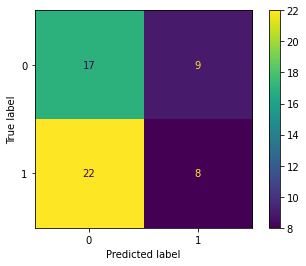

''

In [ ]:
x_columns = ['sum_c_vec', 'sum_tf_vec','news_price', 'MACD', 'MACD_SIGNAL', 
             'MACD_DIFF', 'TAS_K', 'TAS_D', 'TAS_DS', 'TAS_DSS', 'CMCI',
             'RSI', 'BB_MA', 'BB_UPPER', 'BB_LOWER', 'BB_WIDTH', 'BB_PERCENT',
             'Area Harvested_Million Acres', 'Area Planted_Million Acres',
             'Average Farm Price_US Dollars/Bushel', 'Begining Stocks_Million Bushels',
             'Crushing_Million Bushels', 'Ending Stocks_Million Bushels',
             'Exports_Million Bushels', 'Imports_Million Bushels', 'Production_Million Bushels',
             'Residual Use_Million Bushels', 'Seed Use_Million Bushels', 'Total demand_Million Bushels',
             'Total Supply_Million Bushels', 'Yield_Bushels/Acre']

y_train = model_train['price_next_week']
x_train = model_train[x_columns]

y_test = model_test['price_next_week']
x_test = model_test[x_columns]

y_hat = pd.DataFrame()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

knn = knn_model(x_train, y_train)
stat_model_predict(knn, x_test, y_test)
;

              precision    recall  f1-score   support

           0     0.3333    0.7500    0.4615         4
           1     0.6667    0.2500    0.3636         8

    accuracy                         0.4167        12
   macro avg     0.5000    0.5000    0.4126        12
weighted avg     0.5556    0.4167    0.3963        12



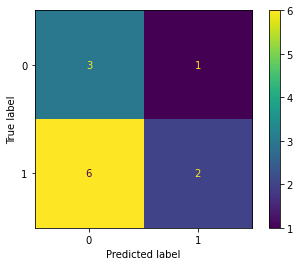

              precision    recall  f1-score   support

           0     0.4000    0.5455    0.4615        11
           1     0.4444    0.3077    0.3636        13

    accuracy                         0.4167        24
   macro avg     0.4222    0.4266    0.4126        24
weighted avg     0.4241    0.4167    0.4085        24



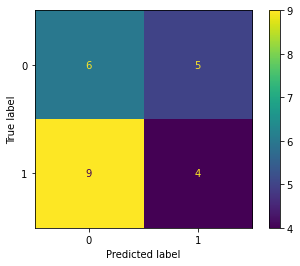

              precision    recall  f1-score   support

           0     0.5000    0.5789    0.5366        19
           1     0.4286    0.3529    0.3871        17

    accuracy                         0.4722        36
   macro avg     0.4643    0.4659    0.4618        36
weighted avg     0.4663    0.4722    0.4660        36



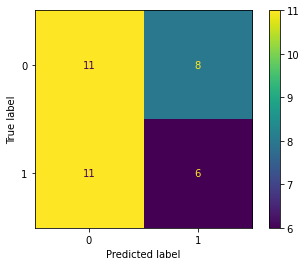

              precision    recall  f1-score   support

           0     0.5161    0.6400    0.5714        25
           1     0.4706    0.3478    0.4000        23

    accuracy                         0.5000        48
   macro avg     0.4934    0.4939    0.4857        48
weighted avg     0.4943    0.5000    0.4893        48



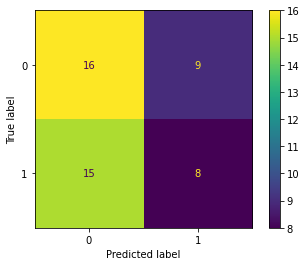

              precision    recall  f1-score   support

           0     0.4359    0.6538    0.5231        26
           1     0.4706    0.2667    0.3404        30

    accuracy                         0.4464        56
   macro avg     0.4532    0.4603    0.4318        56
weighted avg     0.4545    0.4464    0.4252        56



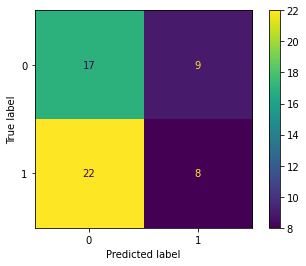

In [ ]:
for i in range(1,6):
  stat_model_predict(knn, x_test[:i*12], y_test[:i*12])

              precision    recall  f1-score   support

           0     0.9157    0.8539    0.8837       178
           1     0.8646    0.9222    0.8925       180

    accuracy                         0.8883       358
   macro avg     0.8901    0.8881    0.8881       358
weighted avg     0.8900    0.8883    0.8881       358



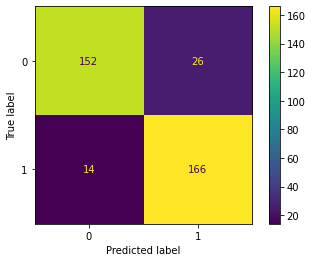

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(data[x_columns])
y_hat['y_hat_knn'] = stat_model_predict(knn, x, data['price_next_week'])

In [ ]:
y_hat

,y_hat_knn
0,1
1,1
2,0
3,0
4,0
...,...
353,1
354,1
355,1
356,1


In [ ]:
week = data[['week', 'dates']]
week.reset_index(drop=True, inplace=True)
week.head()

,week,dates
0,วันที่ 9 -13 กุมภาพันธ์ 2558,201507
1,วันที่ 16-20 กุมภาพันธ์ 2558,201508
2,วันที่ 23 - 27กุมภาพันธ์2558,201509
3,วันที่ 2 - 6 มีนาคม 2558,201510
4,วันที่ 9-13 มีนาคม 2558,201511


In [ ]:
y_model = pd.DataFrame(data['price_next_week'])
y_model.head()

,price_next_week
0,1
1,1
2,0
3,0
4,0


In [ ]:
y = pd.concat([week, y_model, y_hat], ignore_index = False, axis = 1)
y['dates'] = y['dates'].astype(str)

In [ ]:
week_price = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/soybean_week_price.csv')
week_price = week_price[['Dates', 'PX_LAST']]
week_price = week_price.rename(columns={'Dates': 'dates', 'PX_LAST' : 'week_close_price'})

week_price['dates'] = week_price['dates'].apply(group_date)

week_price

,dates,week_close_price
0,200001,478.75
1,200002,496.25
2,200003,505.25
3,200004,523.50
4,200005,505.50
...,...,...
1153,202206,1583.00
1154,202207,1601.50
1155,202208,1590.25
1156,202209,1660.50


In [ ]:
p_return = pd.merge_ordered(y, week_price, on='dates', fill_method='ffill', how='left')
p_return

,week,dates,price_next_week,y_hat_knn,week_close_price
0,วันที่ 9 -13 กุมภาพันธ์ 2558,201507,1,1,990.50
1,วันที่ 16-20 กุมภาพันธ์ 2558,201508,1,1,999.25
2,วันที่ 23 - 27กุมภาพันธ์2558,201509,0,0,1030.75
3,วันที่ 2 - 6 มีนาคม 2558,201510,0,0,985.00
4,วันที่ 9-13 มีนาคม 2558,201511,0,0,974.00
...,...,...,...,...,...
353,วันที่ 3-7 มกราคม 2565,202201,0,1,1410.25
354,วันที่ 10-14 มกราคม 2565,202202,1,1,1369.75
355,วันที่ 17-21 มกราคม 2565,202203,1,1,1414.25
356,วันที่ 24-28 มกราคม 2565,202204,1,1,1470.00


In [ ]:
p_return = get_data_from_years(p_return, [2021, 2022])

in_index = 0
current_state = p_return['y_hat_knn'][0]
p_return['%return'] = None

for idx in p_return.index:
  if p_return['y_hat_knn'][idx] != current_state or idx == len(p_return.index)-1:
    if current_state == 1:
      A = p_return['week_close_price'][idx]
      B = p_return['week_close_price'][in_index]
    else:
      A = p_return['week_close_price'][in_index]
      B = p_return['week_close_price'][idx]

    p_return.loc[idx, '%return'] = (A - B)*100 / B

    in_index = idx
    current_state = p_return['y_hat_knn'][idx]

p_return.loc[p_return.index[-1], '%return'] += 0.25
p_return

,week,dates,price_next_week,y_hat_knn,week_close_price,%return
0,วันที่ 4 - 8 มกราคม 2564,202101,1,1,1374.75,None
1,วันที่ 11-15 มกราคม 2564,202102,0,0,1416.75,3.055101
2,วันที่ 18-22 มกราคม 2564,202103,0,0,1311.75,None
3,วันที่ 25-29 มกราคม 2564,202104,1,0,1370.00,None
4,วันที่ 1-5 กุมภาพันธ์ 2564,202105,1,1,1366.75,3.658314
5,วันที่ 8-11 กุมภาพันธ์ 2564,202106,1,1,1372.00,None
6,วันที่ 15-19 กุมภาพันธ์ 2564,202107,1,1,1377.25,None
7,วันที่ 22-25 กุมภาพันธ์ 2564,202108,1,1,1405.25,None
8,วันที่ 1-5 มีนาคม 2564,202109,1,1,1430.00,None
9,วันที่ 8-12 มีนาคม 2564,202110,0,1,1413.25,None


In [ ]:
p_return['%return_after_comm'] = p_return['%return'].apply(lambda x : None if x is None else x-0.5)
p_return

,week,dates,price_next_week,y_hat_knn,week_close_price,%return,%return_after_comm
0,วันที่ 4 - 8 มกราคม 2564,202101,1,1,1374.75,None,NaN
1,วันที่ 11-15 มกราคม 2564,202102,0,0,1416.75,3.055101,2.555101
2,วันที่ 18-22 มกราคม 2564,202103,0,0,1311.75,None,NaN
3,วันที่ 25-29 มกราคม 2564,202104,1,0,1370.00,None,NaN
4,วันที่ 1-5 กุมภาพันธ์ 2564,202105,1,1,1366.75,3.658314,3.158314
5,วันที่ 8-11 กุมภาพันธ์ 2564,202106,1,1,1372.00,None,NaN
6,วันที่ 15-19 กุมภาพันธ์ 2564,202107,1,1,1377.25,None,NaN
7,วันที่ 22-25 กุมภาพันธ์ 2564,202108,1,1,1405.25,None,NaN
8,วันที่ 1-5 มีนาคม 2564,202109,1,1,1430.00,None,NaN
9,วันที่ 8-12 มีนาคม 2564,202110,0,1,1413.25,None,NaN


In [ ]:
np.mean(p_return['%return_after_comm'])/np.std(p_return['%return_after_comm'], ddof=1)

0.008718003382401883

In [ ]:
p_return['%return_after_comm'].sum()

0.8774480826880215

In [ ]:
from numpy.ma.core import round_
all_years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
split_index = 6

summary = {
    'year' : [],
    '%return_after_comm' : [],
    'profit' : [],
    'loss' : [],
    'MDD' : []
}

for year in all_years:
  current_year_data = get_data_from_years(p_return, [year])
  summary['year'].append(year)
  summary['%return_after_comm'].append(round(current_year_data['%return_after_comm'].sum(), 2))
  summary['MDD'].append(abs(round(current_year_data['%return'].min(), 2)))
  summary['profit'].append(len(current_year_data[current_year_data['%return_after_comm'] >= 0]))
  summary['loss'].append(len(current_year_data[current_year_data['%return_after_comm'] < 0]))

In [ ]:
summary = pd.DataFrame(summary)
summary

,year,%return_after_comm,profit,loss,MDD
0,2015,0.00,0,0,NaN
1,2016,0.00,0,0,NaN
2,2017,0.00,0,0,NaN
3,2018,0.00,0,0,NaN
4,2019,0.00,0,0,NaN
5,2020,0.00,0,0,NaN
6,2021,1.89,11,6,8.53
7,2022,-1.02,1,1,10.42


In [ ]:
for idx in summary['profit'].index, summary['loss'].index:

  A = summary['profit'][idx]
  B = summary['loss'][idx]

  summary.loc[idx, 'accuracy'] = round((A / ( A + B ))*100, 2)

summary

,year,%return_after_comm,profit,loss,MDD,accuracy
0,2015,0.00,0,0,NaN,NaN
1,2016,0.00,0,0,NaN,NaN
2,2017,0.00,0,0,NaN,NaN
3,2018,0.00,0,0,NaN,NaN
4,2019,0.00,0,0,NaN,NaN
5,2020,0.00,0,0,NaN,NaN
6,2021,1.89,11,6,8.53,64.71
7,2022,-1.02,1,1,10.42,50.00


In [ ]:
(summary['profit'].sum()/(summary['profit'].sum()+summary['loss'].sum()))*100

63.1578947368421